# Prediction using Decision Tree Algorithm

## Decision Tree classifier

## GRIP Internship Program

### Importing Required Libraries

In [1]:
import numpy as np 

In [2]:
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.tree import DecisionTreeClassifier 

### Uploading the dataset

In [6]:
df = pd.read_csv("Iris.csv")

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Pre-processing

In [8]:
df = df.drop(columns = ["Id"])

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Feature Selection

In [12]:
x = df[["SepalLengthCm","SepalWidthCm", "PetalLengthCm","PetalWidthCm"]].values

In [13]:
y = df["Species"]

### Split the dataset train/test

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size=.3, random_state=4)

In [16]:
print("shape of training set",x_train.shape,y_train.shape)
print("shape of testing set", x_test.shape,y_test.shape)

shape of training set (105, 4) (105,)
shape of testing set (45, 4) (45,)


### Building Decision Tree Classifier

In [17]:
DT =DecisionTreeClassifier(criterion="entropy")
DT

DecisionTreeClassifier(criterion='entropy')

In [18]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
y_pred = DT.predict(x_test)

In [20]:
y_pred[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

### Model evaluation 

In [21]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

In [22]:
print("DT Jaccard index: %.2f" % jaccard_score(y_test, y_pred, average="micro"))

DT Jaccard index: 0.96


In [23]:
print("DT F1-score: %.2f" % f1_score(y_test, y_pred, average="micro"))

DT F1-score: 0.98


In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
CM=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

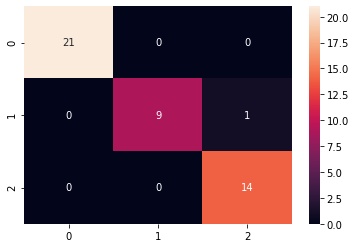

In [26]:
sns.heatmap(CM,annot=True)

In [27]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



###  Decision Tree Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

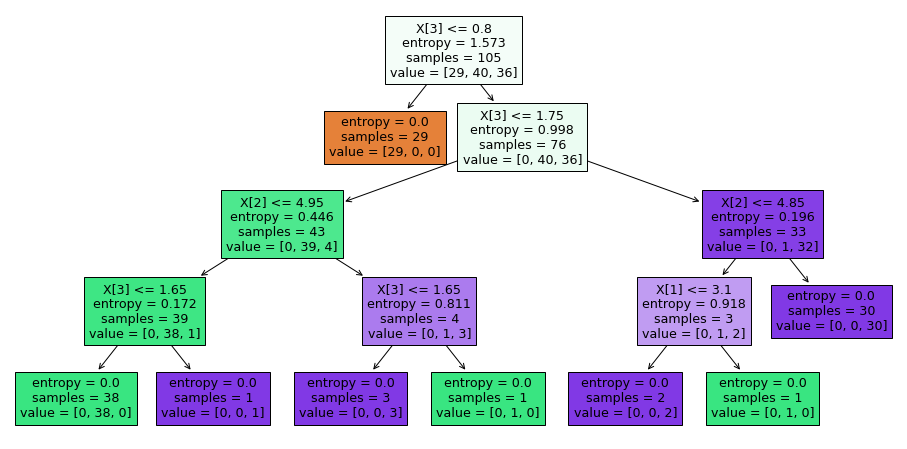

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,8))
plot_tree(DT,filled=True)
plt.show

### Feeding new data to the classifier to predict the class

In [29]:
DT.predict([[5, 3.7, 4,.4]])


array(['Iris-setosa'], dtype=object)

In [30]:
DT.predict([[7, 4.5, 5,3]])


array(['Iris-virginica'], dtype=object)